# **Pairwise Sequence Alignment**

# The Needleman-Wunsch Algorithm

The Needleman-Wunsch algorithm finds the optimal *global* alignment (end-to-end) between two sequences.
It consists of the following steps:

1. Construct the grid
2. Choose a scoring system (here we use the original scoring system assigning a score $s$ of 1 to a match, a score $s$ of -1 to a mismatch, and a score $d$ of -1 to a gap/indel)
3. Fill in the scoring matrix $F$ (and construct the pointer matrix on the way)
4. Use the pointer matrix to perform a traceback to recover the optimal warping path

The scores in the scoring matrix $F$ are computed using the already existing scores in the left, top-left, and top cells:

$$
F(i,j)=\max
\begin{cases}
    F(i-1,j-1)+s(x_i,y_i),\\
    F(i-1,j)+d,\\
    F(i,j-1)+d.
\end{cases}
$$

The following image illustrates the scoring and pointer matrices.

<img src="images/nw_matrix.png" width="500" />

We can use the `make_align()` function from our `alignment` module to generate an `align()` function that performs the Needleman-Wunsch algorithm.

In [36]:
import alignment as aln

x = "GATTACA"
y = "CATACCCA"

align = aln.make_align(mode="global")
x_aln, y_aln, warp_path_x, warp_path_y, scoring_mat = align(seq_a=x, seq_b=y)

We can also plot the alignment together with the scoring matrix:

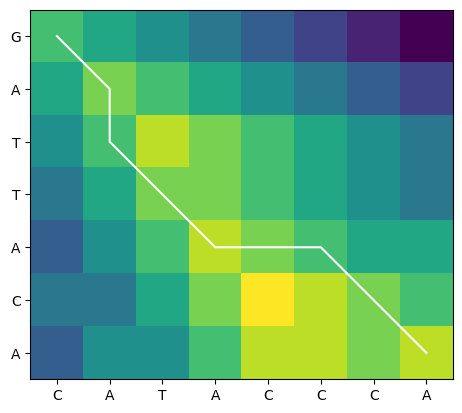

In [37]:
import matplotlib.pyplot as plt  # type: ignore

plt.imshow(X=scoring_mat)
plt.plot(warp_path_y, warp_path_x, "w")
plt.xticks(ticks=range(len(y)), labels=y)
plt.yticks(ticks=range(len(x)), labels=x)
plt.show()

# The Smith-Waterman Algorithm

The Smith-Waterman algorithm finds the optimal *local* alignment between two sequences.
It is a variation of the Needleman-Wunsch algorithm.

The three main differences are:

|                | Smith-Waterman algorithm                                | Needleman-Wunsch algorithm                                                 |
|----------------|---------------------------------------------------------|----------------------------------------------------------------------------|
| Initialization | First row/column = 0                                    | First row/column subject to gap penalty                                    |
| Scoring        | Negative scores are set to 0                            | Scores can be negative                                                     |
| Traceback      | Begin with the highest score, end when 0 is encountered | Begin with the cell at the lower right of the matrix, end at top left cell |

Again, with our `alignment` module, we can perform the local alignment between the sequences `GATACCA` and `NNNNNNNNNNGATTACANNNNNNNNGATNNNNNNNNN`.

Multiple possible traceback starts: [ 5 16], [ 7 17]
Chose random traceback start from choices: [ 7 17]


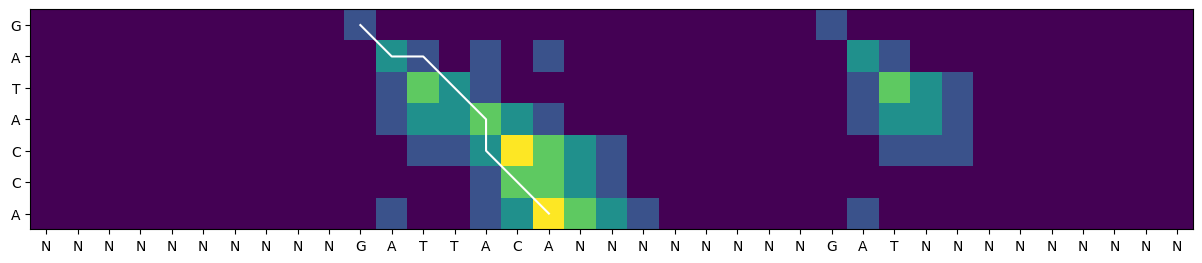

In [38]:
x = "GATACCA"
y = "NNNNNNNNNNGATTACANNNNNNNNGATNNNNNNNNN"

align = aln.make_align(mode="local")
x_aln, y_aln, warp_path_x, warp_path_y, scoring_mat = align(seq_a=x, seq_b=y)

plt.figure(figsize=(15, 8))
plt.imshow(X=scoring_mat)
plt.xticks(ticks=range(len(y)), labels=y)
plt.yticks(ticks=range(len(x)), labels=x)
plt.plot(warp_path_y, warp_path_x, "w")
plt.show()

# Read Alignment

We can also simulate the alignment of many reads originating from e.g., a bulk DNA sequencing experiment.

##### ❓ Sampling reads from a reference sequence

Simulate the generation of a number of reads, by sampling 5 reads from the reference sequence `GATTTGGGGTTCAAAGCAGTATCGATCAAATAGTAAATCCATTTGTTCAACTCACAGTTTA`.

In [39]:
import random

reference_sequence = "GATTTGGGGTTCAAAGCAGTATCGATCAAATAGTAAATCCATTTGTTCAACTCACAGTTTA"

n_reads = 20
min_read_len = 15
max_read_len = 25

reads = []

while len(reads) < n_reads:
    range_acquired = False
    while not range_acquired:
        start = random.randint(0, len(reference_sequence) - max_read_len)
        end = random.randint(start + min_read_len, start + max_read_len)
        if end < len(reference_sequence):
            reads.append(reference_sequence[start:end])
            range_acquired = True   

print(reads)

['AAATCCATTTGTTCAA', 'GATCAAATAGTAAATCCA', 'ATCAAATAGTAAATCCATTTGTTC', 'AGTAAATCCATTTGTTCAACTCA', 'AGTAAATCCATTTGTTCAACTCAC', 'GATTTGGGGTTCAAA', 'AATAGTAAATCCATTTG', 'TTGGGGTTCAAAGCAGTA', 'TAGTAAATCCATTTGTTCAACTCAC', 'GGGTTCAAAGCAGTATC', 'GCAGTATCGATCAAATAGT', 'GGGTTCAAAGCAGTATCGA', 'GTTCAAAGCAGTATCGATCA', 'ATTTGGGGTTCAAAGCAGTAT', 'TGGGGTTCAAAGCAGTATCGAT', 'GATTTGGGGTTCAAAGCAGTATC', 'AATCCATTTGTTCAACTCACAGTT', 'ATCGATCAAATAGTAAATCC', 'GTAAATCCATTTGTTCAA', 'GGGGTTCAAAGCAGTATCGATCAA']


##### ❓ Adding noise to the sampled reads

Add some noise to the sampled reads.

In [40]:
def add_noise(read: str, noiselessness: int = 4) -> tuple[str, int]:
    """Add noise to a read."""
    choices = ["A", "C", "G", "T"]
    n_noisy_bases = 0
    noisy_read = ""
    for base in read:
        noisy_read += random.choice(seq=choices)
        n_noisy_bases += 1
    return noisy_read, n_noisy_bases


noisy_reads = []
for read in reads:
    noisy_read, n_noisy_bases = add_noise(read=read, noiselessness=3)
    print(f"Added {n_noisy_bases:2} noisy base(s): {read:10s} -> {noisy_read:10s}")
    noisy_reads.append(noisy_read)

Added 16 noisy base(s): AAATCCATTTGTTCAA -> GTGCGTCTAGATATAG
Added 18 noisy base(s): GATCAAATAGTAAATCCA -> CCCCAGGAAGCGCAAAAA
Added 24 noisy base(s): ATCAAATAGTAAATCCATTTGTTC -> GGTCGGGGTAGGAGAAGGATATCA
Added 23 noisy base(s): AGTAAATCCATTTGTTCAACTCA -> TGGCAGGTGCTCCGGCACGGGGA
Added 24 noisy base(s): AGTAAATCCATTTGTTCAACTCAC -> CACCCAAGGGGTCTCAAATGCATC
Added 15 noisy base(s): GATTTGGGGTTCAAA -> TGACTTTCGAATGAC
Added 17 noisy base(s): AATAGTAAATCCATTTG -> CTAAGAGACTGTAAAGG
Added 18 noisy base(s): TTGGGGTTCAAAGCAGTA -> ACACACACGGTCTGCTTA
Added 25 noisy base(s): TAGTAAATCCATTTGTTCAACTCAC -> AAAACTTAGACCCCCGATCTGCAAG
Added 17 noisy base(s): GGGTTCAAAGCAGTATC -> GTTTAAGTCGATATCTA
Added 19 noisy base(s): GCAGTATCGATCAAATAGT -> AGGAACTAATTTTCCTCAT
Added 19 noisy base(s): GGGTTCAAAGCAGTATCGA -> CCGCTACTGAGGGGGCCCA
Added 20 noisy base(s): GTTCAAAGCAGTATCGATCA -> CTCCACCGGGGCTCAGGGAA
Added 21 noisy base(s): ATTTGGGGTTCAAAGCAGTAT -> CCTGTTGGCAGCACATGCTCT
Added 22 noisy base(s): TGGGGTTCAAAGCAGTAT

##### ❓ Aligning reads

Use the `make_align()` function from the `alignment` module to generate an `align()` function to align the noisy reads locally to the reference sequence.

Multiple possible traceback starts: [15 35], [16 33]
Chose random traceback start from choices: [15 35]
Read                      : GTGCGTCTAGATATAG
Mapping position (0-based): 22
Aligned read              : CG-TCTAGATA-TA
Aligned read w/o gaps     : CGTCTAGATATA
Number of clipped bases   : 4
Reference subsequence     : CGATCAAATAGTA


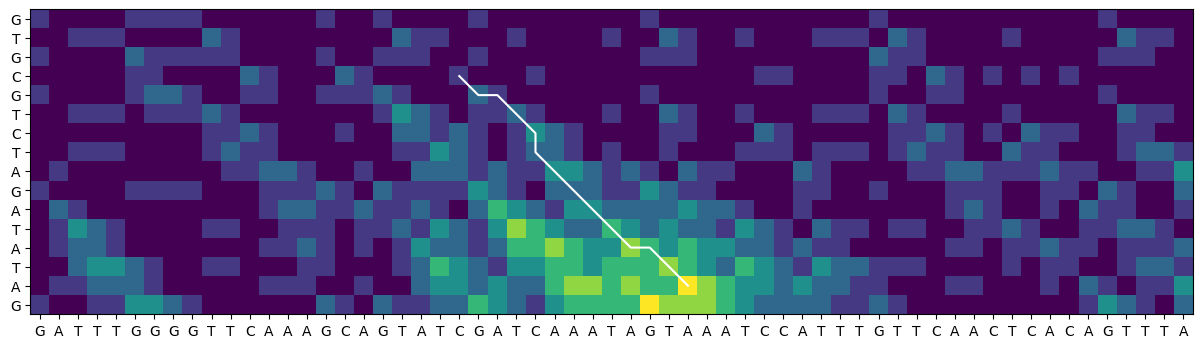

Multiple possible traceback starts: [16 30], [17 32], [18 32]
Chose random traceback start from choices: [16 30]
Read                      : CCCCAGGAAGCGCAAAAA
Mapping position (0-based): 16
Aligned read              : CAGGAAGCG--CAAA
Aligned read w/o gaps     : CAGGAAGCGCAAA
Number of clipped bases   : 5
Reference subsequence     : CAGTATCGATCAAA


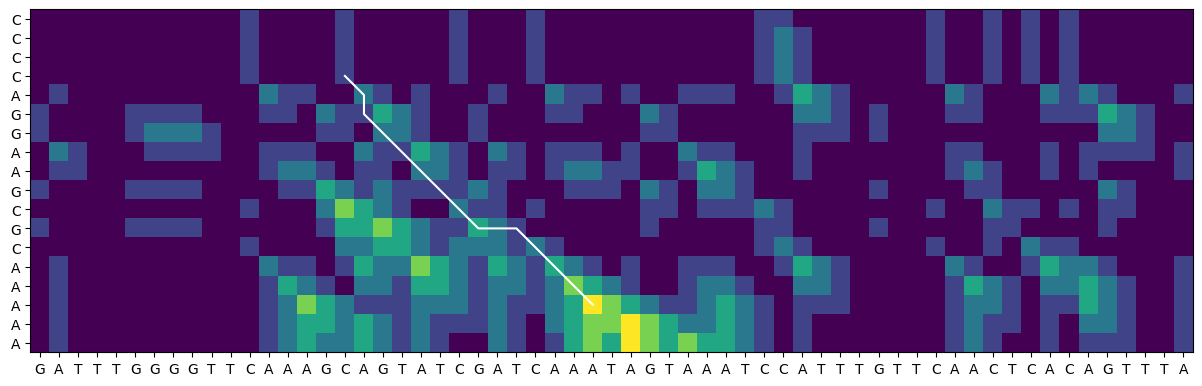

Multiple possible traceback starts: [23 23], [24 25], [24 28]
Chose random traceback start from choices: [24 25]
Read                      : GGTCGGGGTAGGAGAAGGATATCA
Mapping position (0-based): 5
Aligned read              : GGGGTAGGAGAAGGA-TATC-A
Aligned read w/o gaps     : GGGGTAGGAGAAGGATATCA
Number of clipped bases   : 4
Reference subsequence     : GGGGTTCAAAGCAGTATCGA


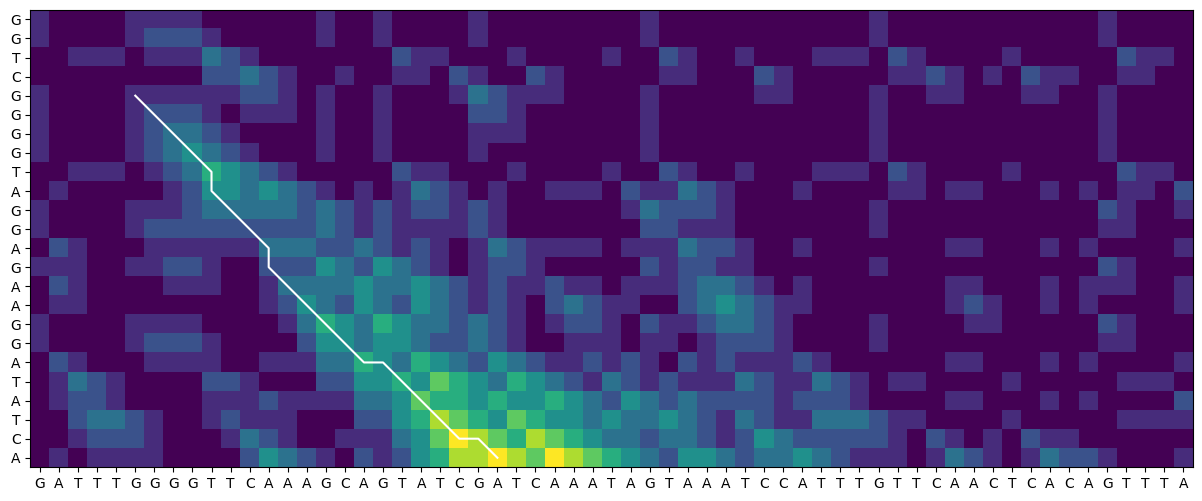

Multiple possible traceback starts: [ 6 19], [ 8 10], [ 8 20], [10 12], [12 12], [12 23], [12 27], [14 24], [17 18], [17 28], [19 19], [22  9]
Chose random traceback start from choices: [17 28]
Read                      : TGGCAGGTGCTCCGGCACGGGGA
Mapping position (0-based): 15
Aligned read              : GCAGGTGCTCCG-GCA
Aligned read w/o gaps     : GCAGGTGCTCCGGCA
Number of clipped bases   : 8
Reference subsequence     : GCAGTATCGATCA


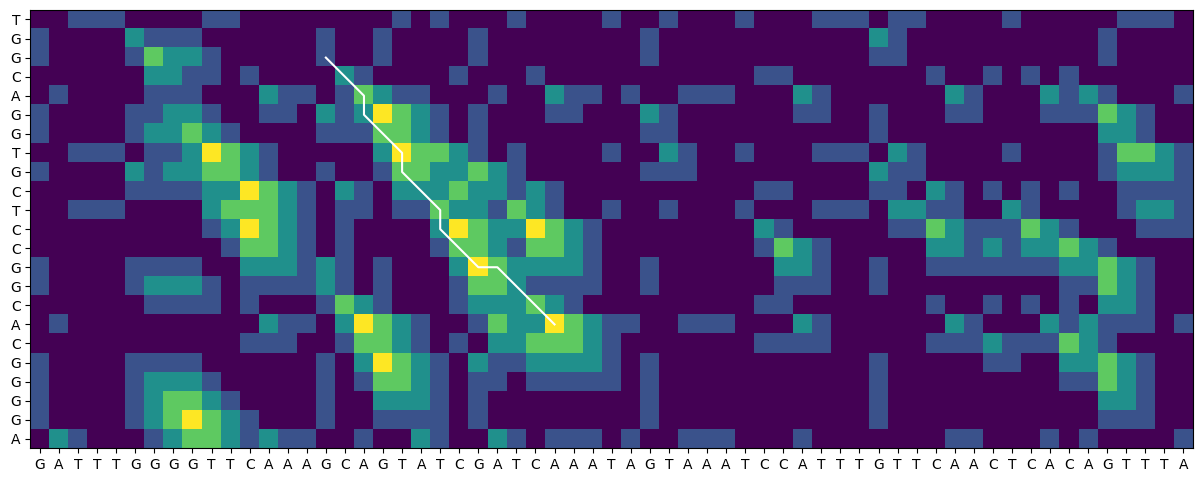

Multiple possible traceback starts: [22 18], [23 20]
Chose random traceback start from choices: [22 18]
Read                      : CACCCAAGGGGTCTCAAATGCATC
Mapping position (0-based): 5
Aligned read              : GGGGTCTCAAATGCA
Aligned read w/o gaps     : GGGGTCTCAAATGCA
Number of clipped bases   : 9
Reference subsequence     : GGGGTTCAAAGCA


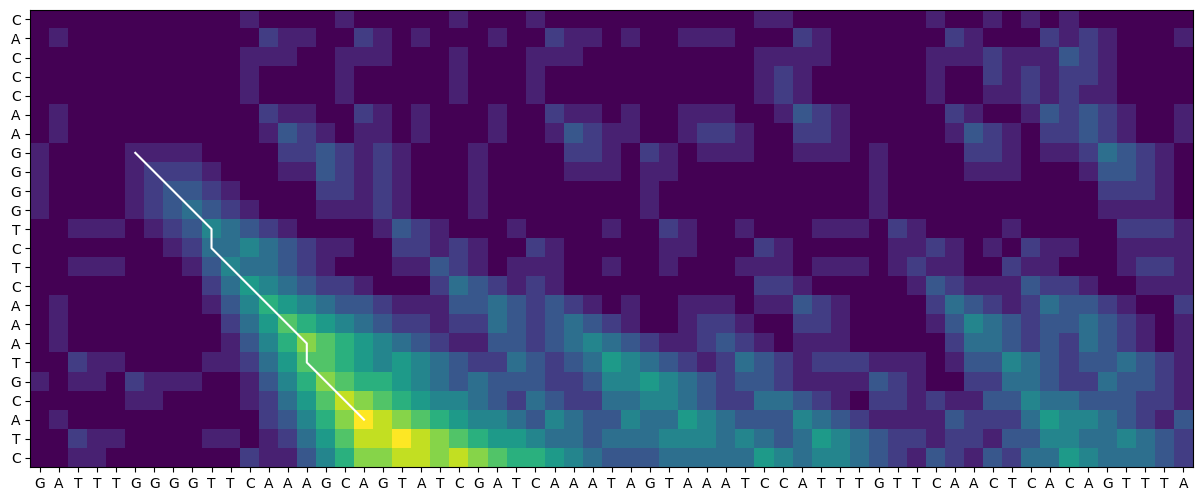

Read                      : TGACTTTCGAATGAC
Mapping position (0-based): 45
Aligned read              : TTCGAA-TGAC
Aligned read w/o gaps     : TTCGAATGAC
Number of clipped bases   : 5
Reference subsequence     : TTCAACTCAC


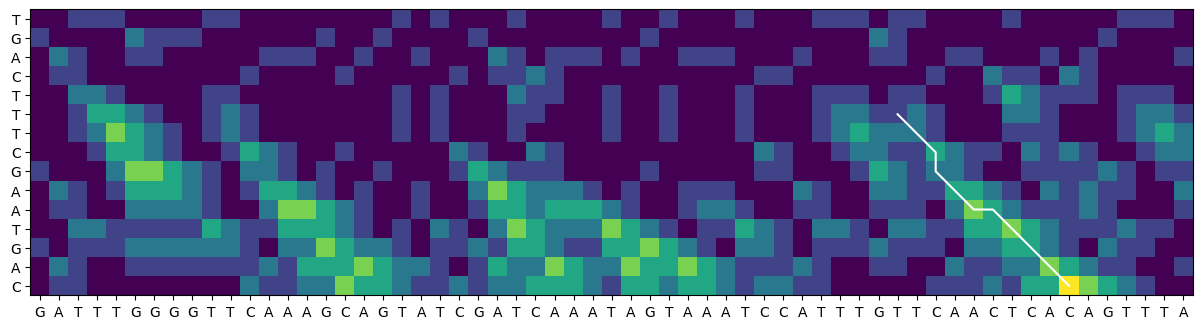

Read                      : CTAAGAGACTGTAAAGG
Mapping position (0-based): 13
Aligned read              : AAG-AG-A-CTG-T-AAA
Aligned read w/o gaps     : AAGAGACTGTAAA
Number of clipped bases   : 4
Reference subsequence     : AAGCAGTATCGATCAAA


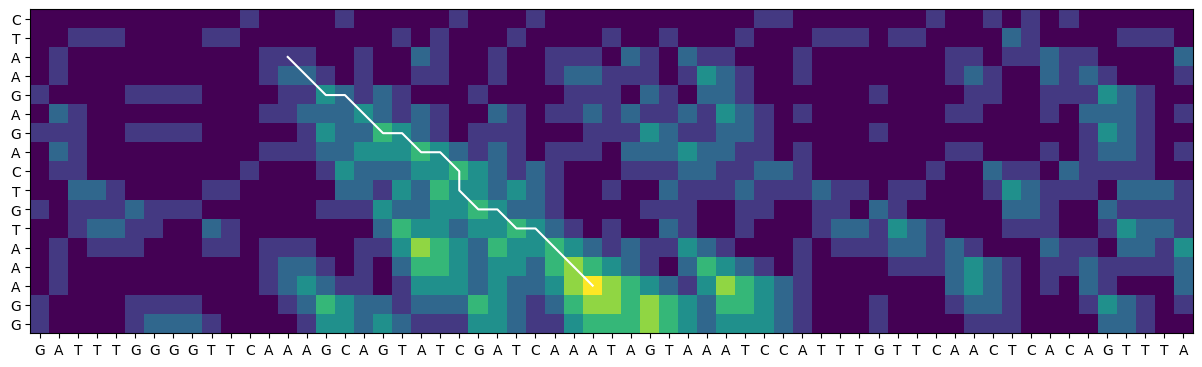

Multiple possible traceback starts: [ 7 56], [ 9 57], [11 58], [11 59], [13 59], [13 60]
Chose random traceback start from choices: [13 60]
Read                      : ACACACACGGTCTGCTTA
Mapping position (0-based): 49
Aligned read              : ACACACGGTCT
Aligned read w/o gaps     : ACACACGGTCT
Number of clipped bases   : 7
Reference subsequence     : ACTCACAGTTT


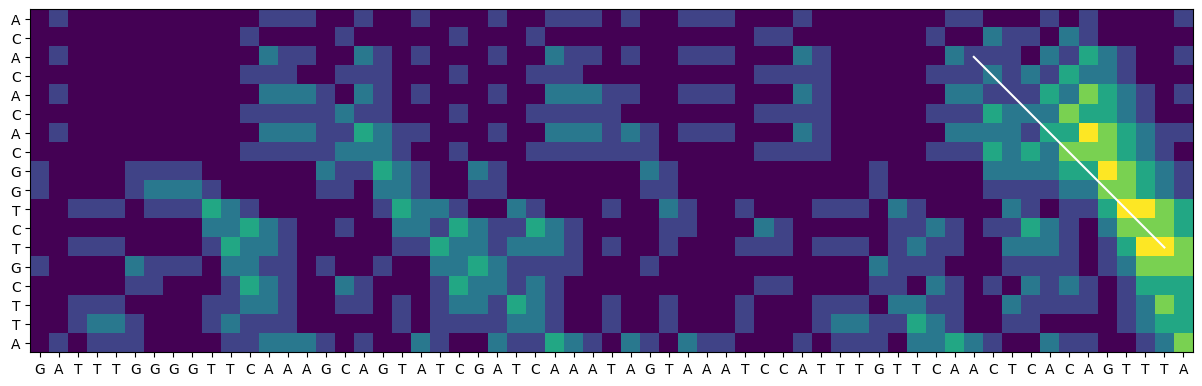

Read                      : AAAACTTAGACCCCCGATCTGCAAG
Mapping position (0-based): 27
Aligned read              : AAACTTAG-ACCCCCGATCTG--CAA
Aligned read w/o gaps     : AAACTTAGACCCCCGATCTGCAA
Number of clipped bases   : 2
Reference subsequence     : AAATAGTAAATCCATTTGTTCAA


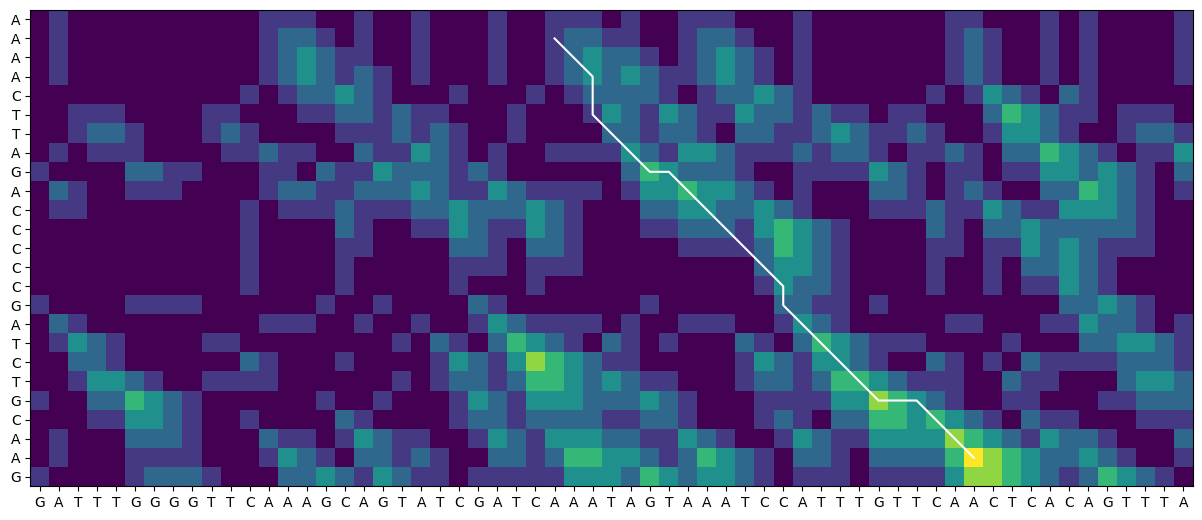

Multiple possible traceback starts: [15 23], [17 25]
Chose random traceback start from choices: [15 23]
Read                      : GTTTAAGTCGATATCTA
Mapping position (0-based): 8
Aligned read              : GTT-TAAGTC-GATATC
Aligned read w/o gaps     : GTTTAAGTCGATATC
Number of clipped bases   : 2
Reference subsequence     : GTTCAAAGCAGTATC


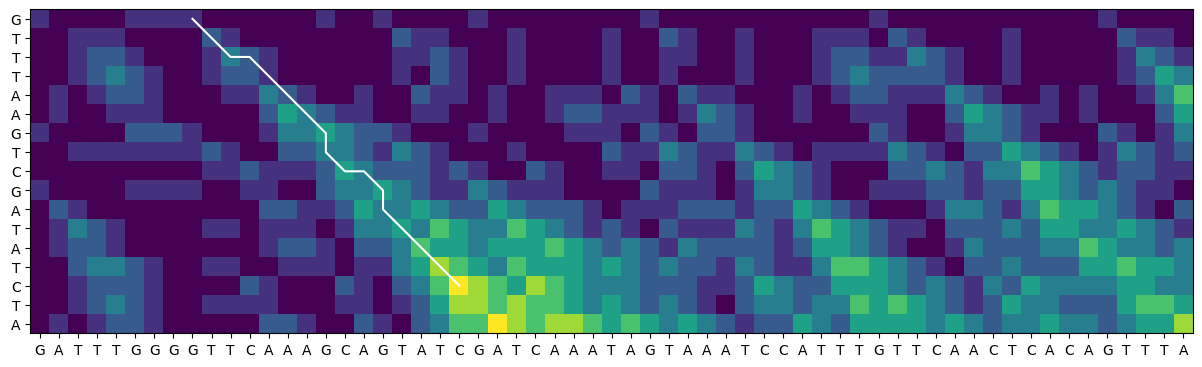

Read                      : AGGAACTAATTTTCCTCAT
Mapping position (0-based): 35
Aligned read              : AA-CTAATT-TTC--CTCA
Aligned read w/o gaps     : AACTAATTTTCCTCA
Number of clipped bases   : 4
Reference subsequence     : AATCCATTTGTTCAACTCA


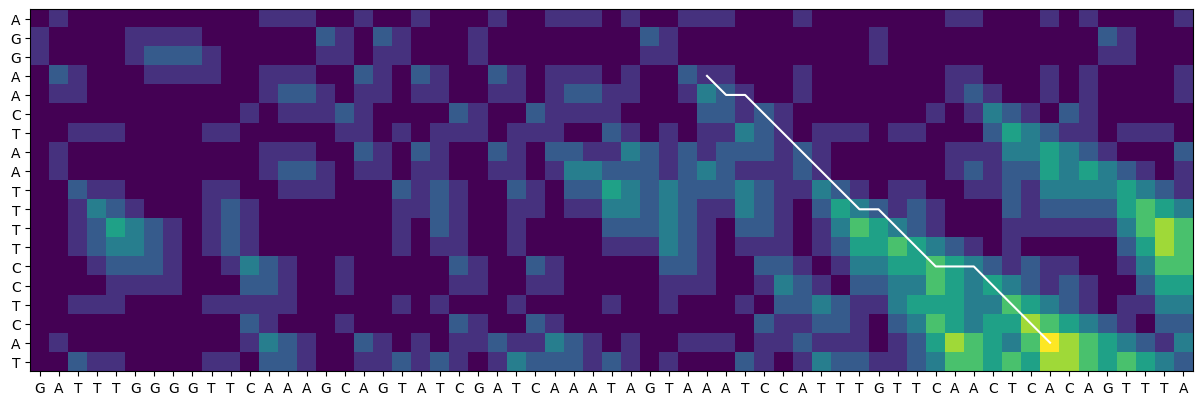

Multiple possible traceback starts: [13  9], [14  9], [15  9], [19 13]
Chose random traceback start from choices: [13  9]
Read                      : CCGCTACTGAGGGGGCCCA
Mapping position (0-based): 4
Aligned read              : TGAGGG
Aligned read w/o gaps     : TGAGGG
Number of clipped bases   : 13
Reference subsequence     : TGGGG


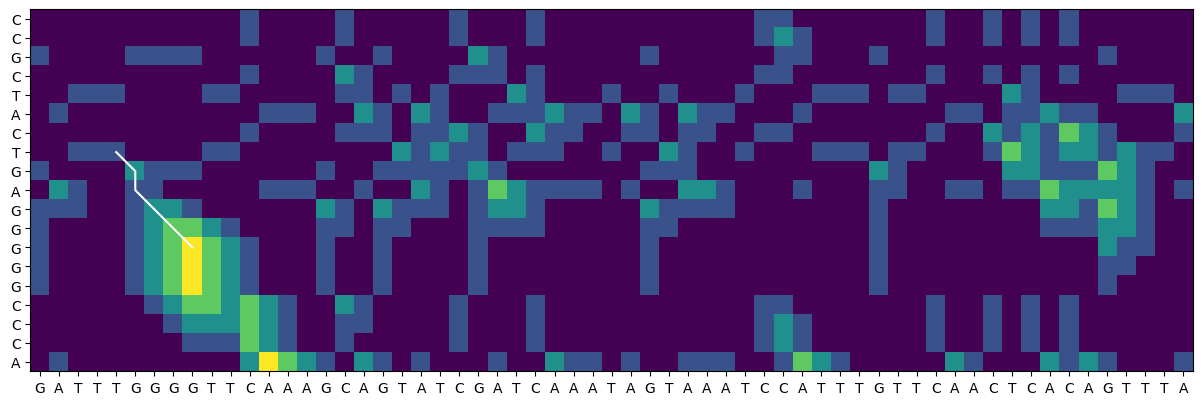

Read                      : CTCCACCGGGGCTCAGGGAA
Mapping position (0-based): 5
Aligned read              : GGGGCTCA
Aligned read w/o gaps     : GGGGCTCA
Number of clipped bases   : 12
Reference subsequence     : GGGGTTCA


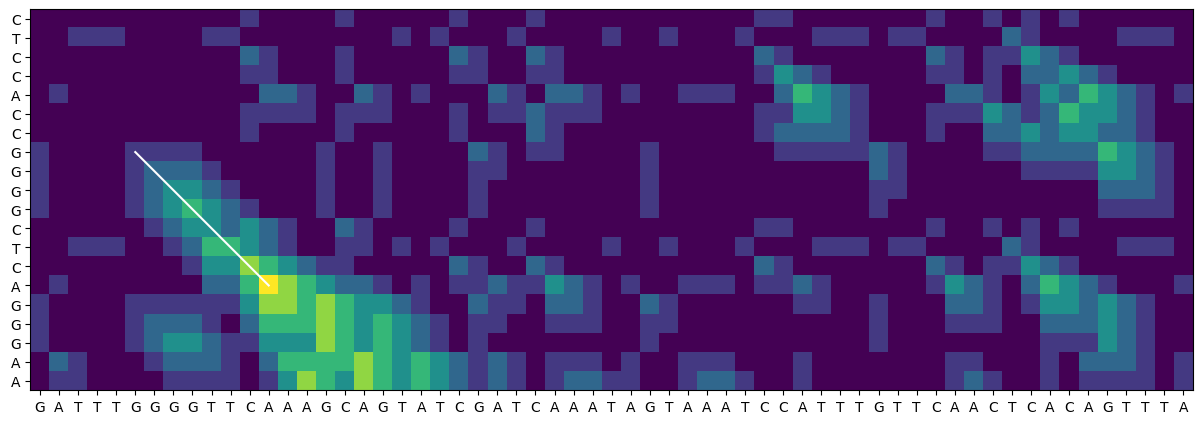

Multiple possible traceback starts: [15 54], [15 56], [16 26], [16 58], [17 57], [18 27], [19 58], [19 59], [20 27], [21 59], [21 60]
Chose random traceback start from choices: [20 27]
Read                      : CCTGTTGGCAGCACATGCTCT
Mapping position (0-based): 14
Aligned read              : AGCA-CAT-GCTC
Aligned read w/o gaps     : AGCACATGCTC
Number of clipped bases   : 10
Reference subsequence     : AGCAGTATCGATC


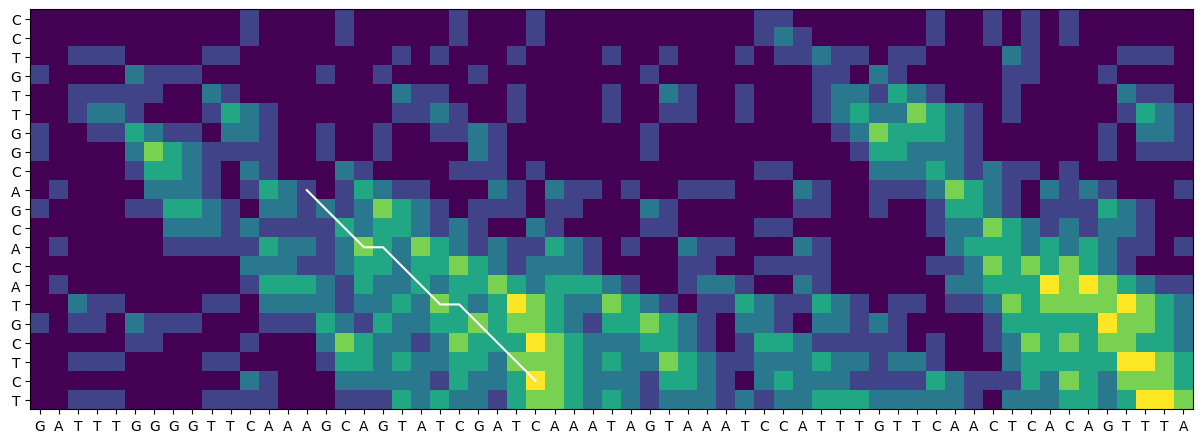

Read                      : TACACGACAGCTGACTAGATAG
Mapping position (0-based): 16
Aligned read              : CAG-CT-GA-CTAGATAG
Aligned read w/o gaps     : CAGCTGACTAGATAG
Number of clipped bases   : 7
Reference subsequence     : CAGTATCGATCAAATAG


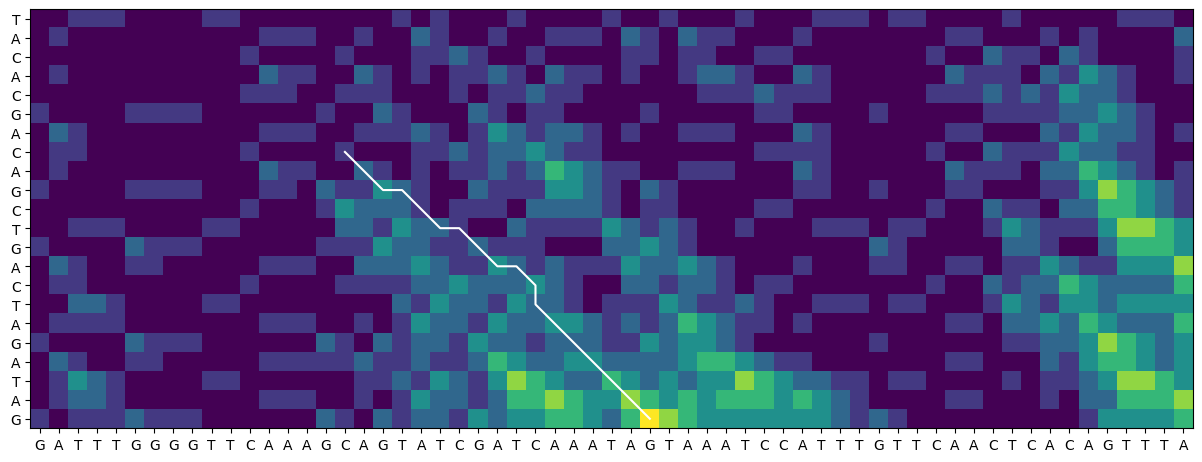

Multiple possible traceback starts: [20 54], [20 56], [21 14], [21 29], [21 50], [21 56], [22 31], [22 52], [22 58], [23 16], [23 33], [23 57]
Chose random traceback start from choices: [22 58]
Read                      : GTCCGTCCCTCGCCCTCTCAATG
Mapping position (0-based): 50
Aligned read              : CTCTCAAT
Aligned read w/o gaps     : CTCTCAAT
Number of clipped bases   : 15
Reference subsequence     : CTCACAGT


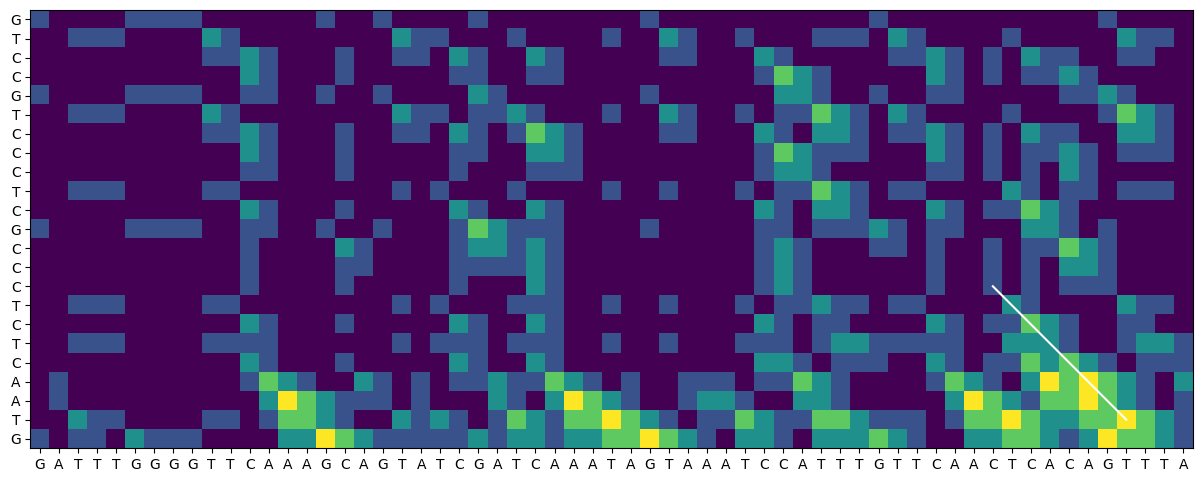

Read                      : GAAAGGAAAATATAGCTCAAGAGT
Mapping position (0-based): 12
Aligned read              : AAAGGAAAATATAGCTC-AAGAGT
Aligned read w/o gaps     : AAAGGAAAATATAGCTCAAGAGT
Number of clipped bases   : 1
Reference subsequence     : AAAGCAGTATCGATCAAATAGT


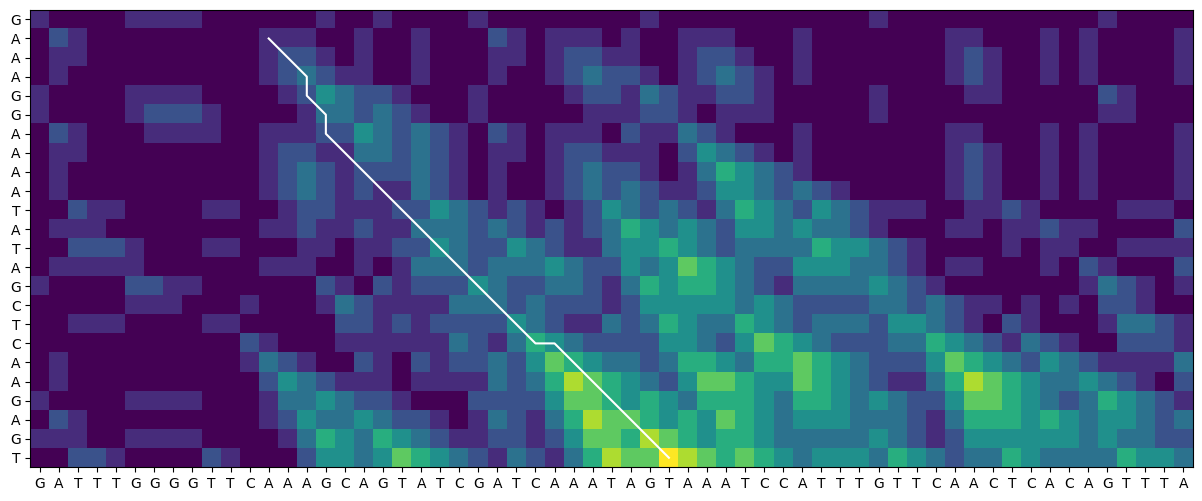

Multiple possible traceback starts: [17 49], [18 51], [20 52]
Chose random traceback start from choices: [18 51]
Read                      : TCACTAGCGATTTTTCACGT
Mapping position (0-based): 40
Aligned read              : ATTT-TTC-AC
Aligned read w/o gaps     : ATTTTTCAC
Number of clipped bases   : 11
Reference subsequence     : ATTTGTTCAAC


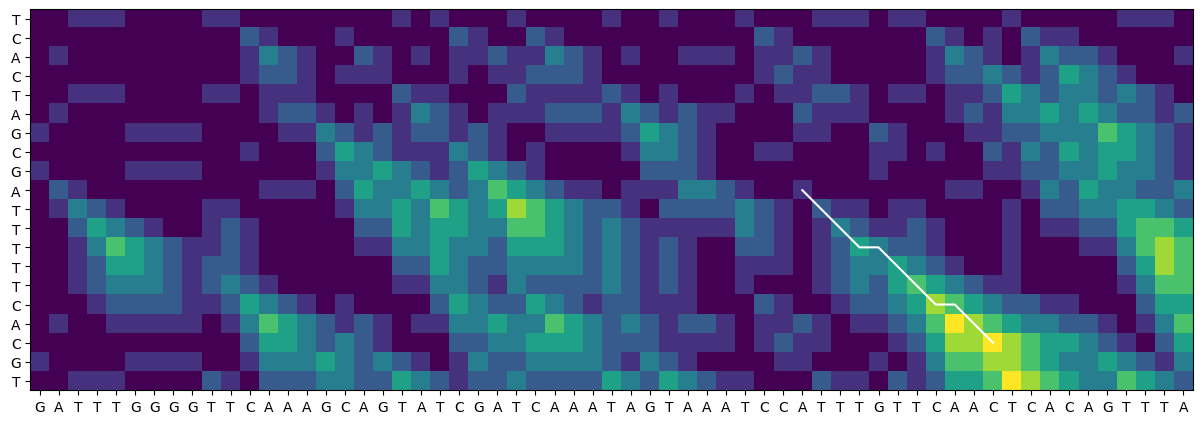

Multiple possible traceback starts: [10 27], [13  6], [13 45], [16 49], [18 39], [18 51], [18 53]
Chose random traceback start from choices: [18 53]
Read                      : CTGACCGATCTTGACATC
Mapping position (0-based): 38
Aligned read              : CCGATCTTG-AC-A-TC
Aligned read w/o gaps     : CCGATCTTGACATC
Number of clipped bases   : 4
Reference subsequence     : CCATTTGTTCAACTC


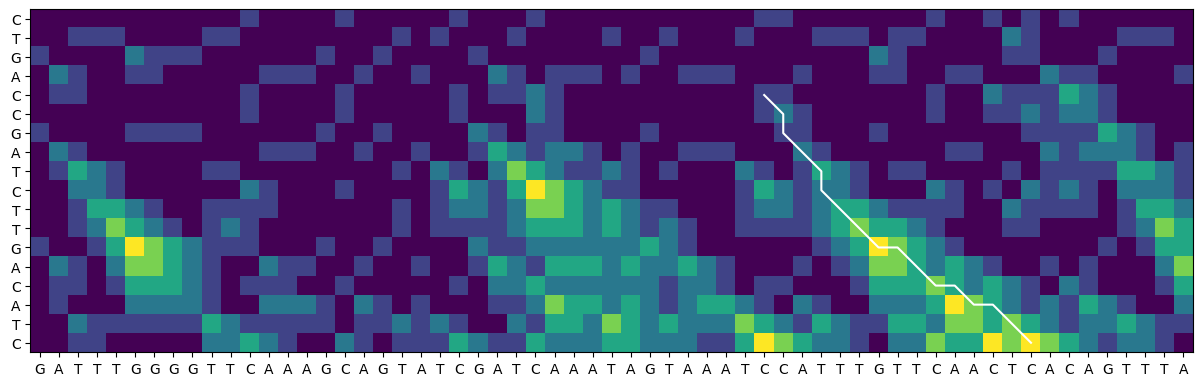

Multiple possible traceback starts: [17 11], [19 13], [21 17]
Chose random traceback start from choices: [19 13]
Read                      : GTAGAGCCAGCGGGGTTGAGCCCC
Mapping position (0-based): 5
Aligned read              : GGGGTTGA
Aligned read w/o gaps     : GGGGTTGA
Number of clipped bases   : 16
Reference subsequence     : GGGGTTCA


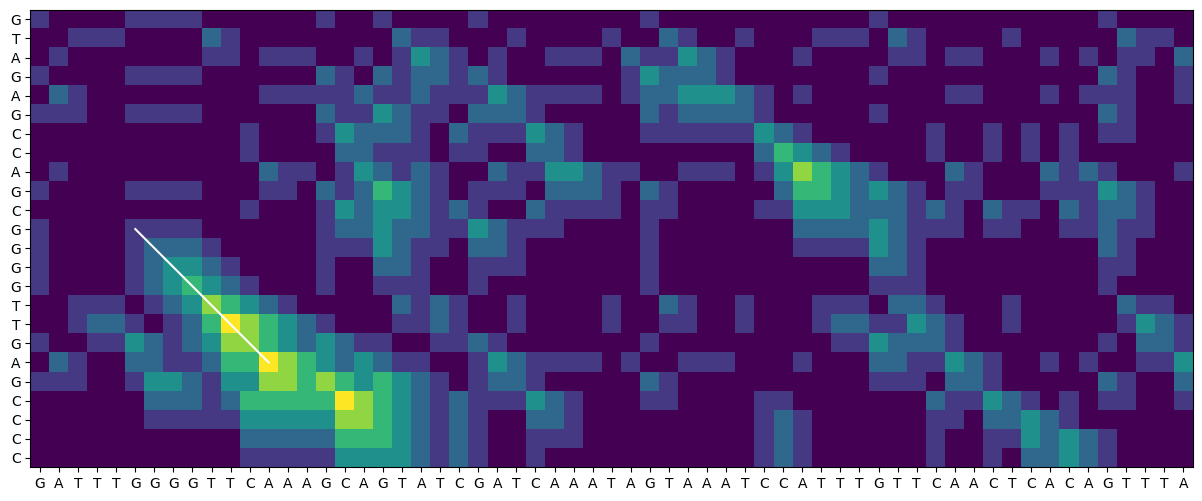

In [41]:
mapping_positions = []
aligned_reads = []

for read in noisy_reads:
    # YOUR CODE
    align = aln.make_align(mode="local")
    read_aln, ref_aln, warp_path_read, warp_path_ref, scoring_mat = align(seq_a=read, seq_b=reference_sequence)
    mapping_position = warp_path_ref[0]
    aligned_read = "".join(read_aln)
    mapping_positions.append(mapping_position)
    aligned_reads.append(aligned_read)

    print(f"Read                      : {read}")
    print(f"Mapping position (0-based): {mapping_position}")
    print(f"Aligned read              : {aligned_read}")
    aligned_read_without_gaps = list(filter(lambda elem: elem != "-", read_aln))
    print(f"Aligned read w/o gaps     : {''.join(aligned_read_without_gaps)}")
    print(f"Number of clipped bases   : {len(read) - len(aligned_read_without_gaps)}")
    print(
        f"Reference subsequence     : "
        f"{reference_sequence[warp_path_ref[0] : (warp_path_ref[-1] + 1)]}"
    )

    plt.figure(figsize=(15, 8))
    plt.imshow(X=scoring_mat)
    plt.plot(warp_path_ref, warp_path_read, "w")
    plt.xticks(ticks=range(len(reference_sequence)), labels=reference_sequence)
    plt.yticks(ticks=range(len(read)), labels=read)
    plt.show()

We now have the following set of aligned reads:

In [42]:
print(f"Reference: {reference_sequence}")
for i, (pos, seq) in enumerate(zip(mapping_positions, aligned_reads)):
    print(f"Read {i:4}: {' ' * pos}{seq}")

Reference: GATTTGGGGTTCAAAGCAGTATCGATCAAATAGTAAATCCATTTGTTCAACTCACAGTTTA
Read    0:                       CG-TCTAGATA-TA
Read    1:                 CAGGAAGCG--CAAA
Read    2:      GGGGTAGGAGAAGGA-TATC-A
Read    3:                GCAGGTGCTCCG-GCA
Read    4:      GGGGTCTCAAATGCA
Read    5:                                              TTCGAA-TGAC
Read    6:              AAG-AG-A-CTG-T-AAA
Read    7:                                                  ACACACGGTCT
Read    8:                            AAACTTAG-ACCCCCGATCTG--CAA
Read    9:         GTT-TAAGTC-GATATC
Read   10:                                    AA-CTAATT-TTC--CTCA
Read   11:     TGAGGG
Read   12:      GGGGCTCA
Read   13:               AGCA-CAT-GCTC
Read   14:                 CAG-CT-GA-CTAGATAG
Read   15:                                                   CTCTCAAT
Read   16:             AAAGGAAAATATAGCTC-AAGAGT
Read   17:                                         ATTT-TTC-AC
Read   18:                                       CCGATCTTG

# Variant Calling

Variant calling is a crucial step in analyzing DNA sequence data to identify differences or variations in the genetic code of individuals.
This process involves comparing an individual's DNA sequence (in the form of aligned reads) to a reference sequence to pinpoint variations such as single nucleotide polymorphisms (SNPs), insertions, deletions, and structural alterations.

While there exist many sophisticated variant calling algorithms such as [GATK](https://gatk.broadinstitute.org)'s [HaplotypeCaller](https://gatk.broadinstitute.org/hc/en-us/articles/360037225632-HaplotypeCaller), we will here focus on SNPs only and perform a simple majority voting per locus.

##### ❓ SNP calling via majority vote

Complete the following code to call SNPs via majority voting.

In [46]:
from collections import Counter

pileups = [[] for _ in range(len(reference_sequence))]
snps = {}

# Accumulate the pileups.
for pos, seq in zip(mapping_positions, aligned_reads):
    # YOUR CODE
    for offset, _ in enumerate(seq):
        # It may happen that an aligned read extends beyond the reference sequence.
        # We decided not to generate additional pileups, and hence, we will just ignore
        # the overhanging bases.
        pileup_index = pos + offset
        if pileup_index < len(reference_sequence):
            pileups[pileup_index].append(seq[offset])

# print(pileups)
# SNP calling via majority voting.
# print("POS   REF   MAJ   SNP   PILEUP")
# for i, pileup in enumerate(pileups):
#     majority_base = ""
#     snp = "-"

#     # Make a pileup string.
#     pileup = "".join(pileup)

#     # We can only call variants for non-empty pileups.
#     if pileup:
#         # YOUR CODE
#         counter = Counter(pileup)
#         majority_base = counter.most_common(1)[0][0]

#     # Call it if it's a SNP.
#     if majority_base != "-" and majority_base != reference_sequence[i]:
#         snp = majority_base
#         snps[i] = snp

#     print(f"{i:3}   {reference_sequence[i]:3}   {majority_base:3}   {snp:3}   {pileup}")

In [11]:
# List all SNPs.
print("POS   SNP")
for pos, snp in snps.items():
    print(f"{pos:3}   {snp:3}")

POS   SNP
  5   C  
  6   T  
  8   A  
  9   G  
 10   G  
 13   T  
 22   T  
 24   G  
 25   A  
 26   T  
 27   C  
 30   G  
 33   A  
 37   A  
 38   G  
 51   C  
 53   C  
 54   A  
 55   C  
 57   G  
 60   T  
